# Importing libraries

In [1]:
# from google.colab import files
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from PIL import Image as Img
import cv2
from skimage.transform import resize
import torch

In [2]:
# print('making images directory')
# !mkdir images
# print('making results directory')
# !mkdir results

In [3]:
# import image here

In [4]:
!git clone https://github.com/spying-on-spyers/U-2-Net.git

Cloning into 'U-2-Net'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 46 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (46/46), done.


In [5]:
%cd U-2-Net

/content/U-2-Net


In [6]:
!python -W ignore u2net_test.py

['/content/U-2-Net/images/2337127678_001.png']
inferencing: 2337127678_001.png


In [7]:
# get the names of the images that were uploaded, removing .jpg
image_dir = os.path.join(os.getcwd(), 'images')
names = [name[:-4] for name in os.listdir(image_dir)]
names

if '.ipynb_checkpo' in names:
  names.remove('.ipynb_checkpo')

In [8]:
# this notebook only uses the first of the uploaded images
name = names[0]
print('List :', names)
print('chosen :', name)

List : ['2337127678_001']
chosen : 2337127678_001


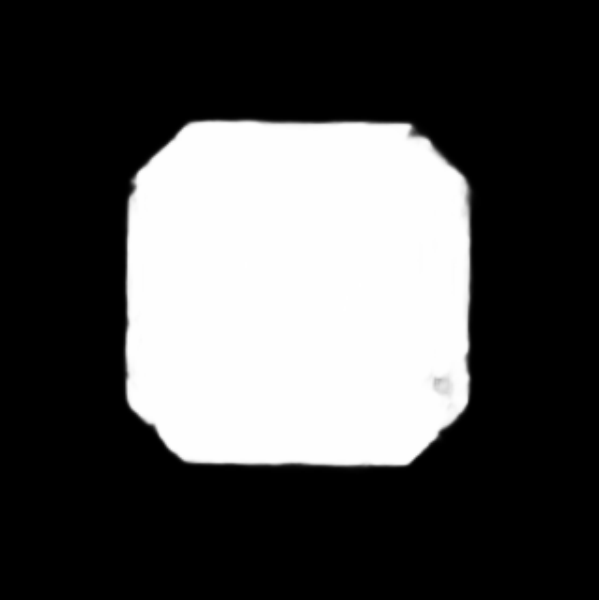

In [9]:
# display result that U-2-Net created
output = load_img('/content/U-2-Net/results/'+name+'.png')
display(output)

# Background Removal

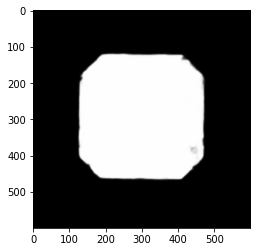

In [10]:
# convert output to numpy array and rescale(255 for RBG images)
RESCALE = 255
out_img = img_to_array(output)
out_img /= RESCALE
import matplotlib.pyplot as plt
plt.imshow(out_img)

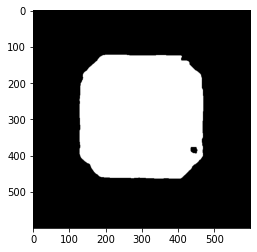

In [11]:
# define the cutoff threshold below which, background will be removed.
THRESHOLD = 0.9

# refine the output
out_img[out_img > THRESHOLD] = 1
out_img[out_img <= THRESHOLD] = 0
plt.imshow(out_img)

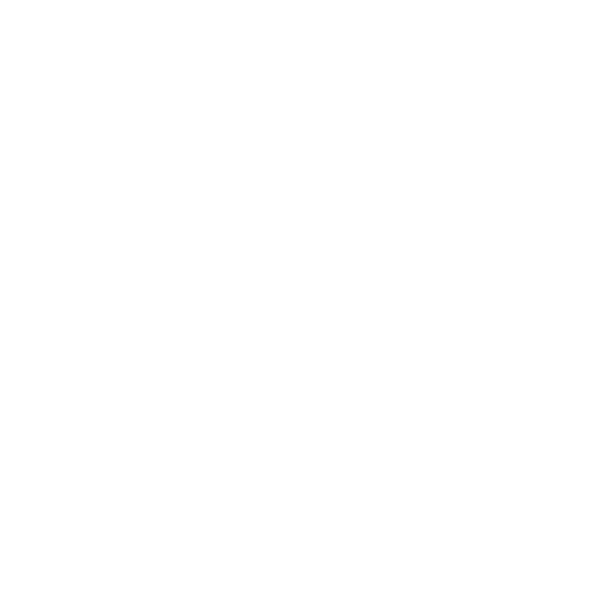

In [12]:
# convert the rbg image to an rgba image and set the zero values to transparent
shape = out_img.shape
a_layer_init = np.ones(shape = (shape[0],shape[1],1))
mul_layer = np.expand_dims(out_img[:,:,0],axis=2)
a_layer = mul_layer*a_layer_init
rgba_out = np.append(out_img,a_layer,axis=2)
display(Img.fromarray((rgba_out*RESCALE).astype('uint8'), 'RGBA'))

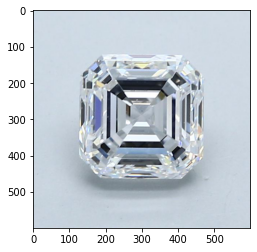

In [13]:
# load and convert input to numpy array and rescale(255 for RBG images)
input = load_img('/content/U-2-Net/images/'+name+'.png')
inp_img = img_to_array(input)
inp_img /= RESCALE
plt.imshow(inp_img)

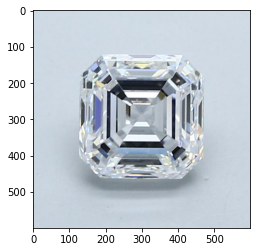

In [14]:
# since the output image is rgba, convert this also to rgba, but with no transparency
a_layer = np.ones(shape = (shape[0],shape[1],1))
rgba_inp = np.append(inp_img,a_layer,axis=2)
plt.imshow(rgba_inp)

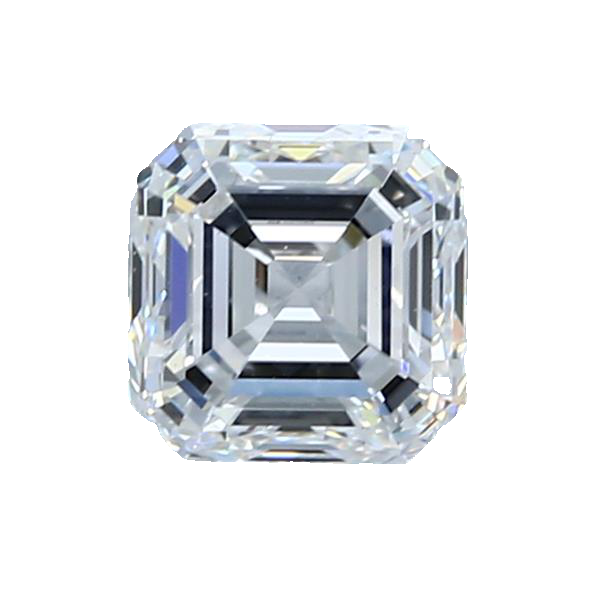

In [15]:
# simply multiply the 2 rgba images to remove the backgound
rem_back = (rgba_inp*rgba_out)
rem_back_scaled = Img.fromarray((rem_back*RESCALE).astype('uint8'), 'RGBA')
display(rem_back_scaled)
# --same, but using cv2--
#rem_back_cv = rem_back[:,:,[2,1,0,3]]
#from google.colab.patches import cv2_imshow
#cv2_imshow(rem_back_cv*RESCALE)

In [16]:
# save the resulting image to colab
rem_back_scaled.save('./results/'+name+'_background_removed.png')

In [17]:
# download the result
# files.download('/content/U-2-Net/'+name+'_background_removed.png')

# Change Background

In [18]:
# get the names of the images that were uploaded, removing .jpg
image_dir = os.path.join(os.getcwd(), 'backgrounds')
backgrounds = [background[:-4] for background in os.listdir(image_dir)]
backgrounds

['black_bg']

In [19]:
# this notebook only uses the first of the uploaded images
background = backgrounds[0] # `black_bg.png`
background

'black_bg'

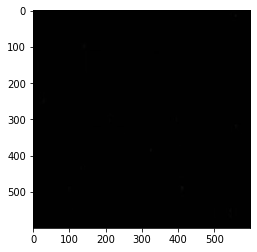

In [20]:
# load and convert background to numpy array and rescale(255 for RBG images)
background_input = load_img('/content/U-2-Net/backgrounds/'+background+'.png')
background_inp_img = img_to_array(background_input)
background_inp_img /= RESCALE
plt.imshow(background_inp_img)

In [21]:
# get dimensions of background (original image will be resized to dimensions of background image in this notebook)
background_height = background_inp_img.shape[0]
background_width = background_inp_img.shape[1]
background_height,background_width

(600, 599)

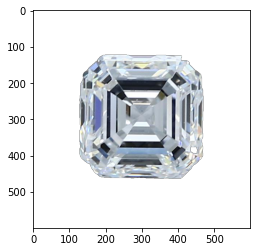

In [22]:
# resize the image
resized_rem_back  = resize(rem_back, (background_height,background_width))
plt.imshow(resized_rem_back)

In [23]:
# create a new array which will store the final result
output_chbg = np.zeros((background_height, background_width, 3))
output_chbg.shape

(600, 599, 3)

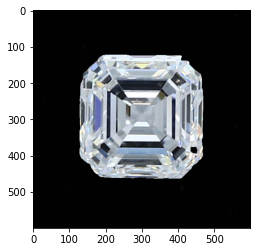

In [24]:
# using the following o[c] = b[c]*(1-i[t])+i[c] {where o - output image, c - channels from 1-3, i - input image with background removed, t - transparent channel}, obtain values for the final result
output_chbg[:,:,0] = background_inp_img[:,:,0]*(1-resized_rem_back[:,:,3])+resized_rem_back[:,:,0]
output_chbg[:,:,1] = background_inp_img[:,:,1]*(1-resized_rem_back[:,:,3])+resized_rem_back[:,:,1]
output_chbg[:,:,2] = background_inp_img[:,:,2]*(1-resized_rem_back[:,:,3])+resized_rem_back[:,:,2]
plt.imshow(output_chbg)

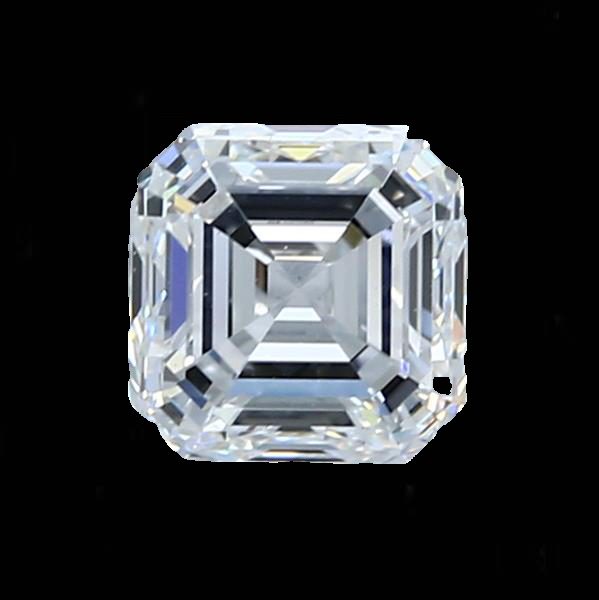

In [25]:
# rescale
output_chbg_scaled = Img.fromarray((output_chbg*RESCALE).astype('uint8'), 'RGB')
display(output_chbg_scaled)

In [26]:
%pwd

'/content/U-2-Net'

In [27]:
# save the resulting image to colab
output_chbg_scaled.save('./results/'+name+'_background_changed.png')

In [28]:
name2 = name

# Sharping

backgrounds/                   images/       results/
data_loader.py                 model/        u2netp.pth
final_hackathon.ipynb          __pycache__/  u2net_test.py
final-hackathon-sharped.ipynb  README.md     u2net_train.py


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


current path backgrounds/                   images/       results/
data_loader.py                 model/        u2netp.pth
final_hackathon.ipynb          __pycache__/  u2net_test.py
final-hackathon-sharped.ipynb  README.md     u2net_train.py
original path :  ./images/2337127678_001.png


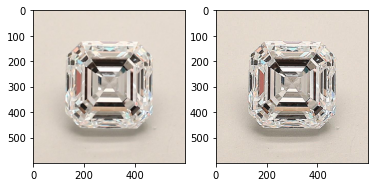

In [29]:
# Sharpen the image

original_image = cv2.imread('/content/U-2-Net/images/'+name+'.png')
plt.imshow(original_image)

kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpe_image = cv2.filter2D(original_image, -1, kernel)
plt.imshow(sharpe_image)
plt.subplot()
%pwd
%ls
# type(sharpe_image)

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.subplot(1, 2, 2)
plt.imshow(sharpe_image)
# cv2.imwrite(sharpe_image)

cv2.imwrite("./images/sharpen_image.png", sharpe_image)
print('current path ', end='')

%ls

original_image_dir = './images/'+name+'.png'
print('original path : ',original_image_dir)
%rm $original_image_dir
# cv2.imwrite("orig_image.png", sharpe_image)

In [30]:
!python -W ignore u2net_test.py

['/content/U-2-Net/images/sharpen_image.png']
inferencing: sharpen_image.png


In [31]:
print(image_dir)
print(name)

/content/U-2-Net/backgrounds
2337127678_001


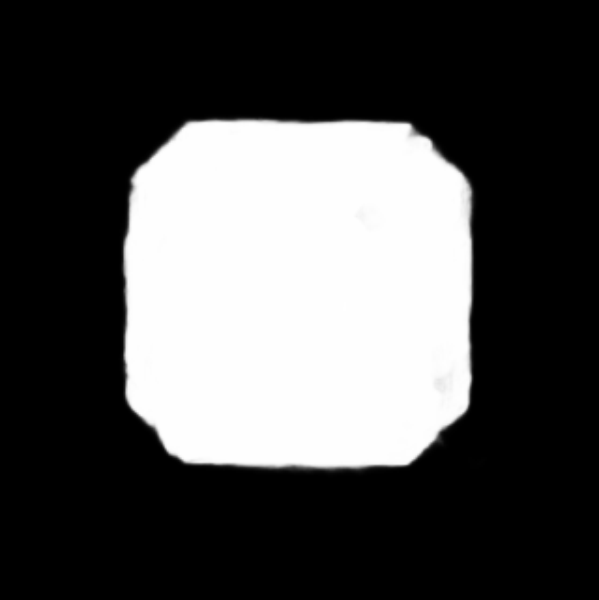

In [32]:
# display result that U-2-Net created

name = 'sharpen_image'

output = load_img('/content/U-2-Net/results/'+name+'.png')
# output = load_img('/content/U-2-Net/images/'+name+'.png')
display(output)

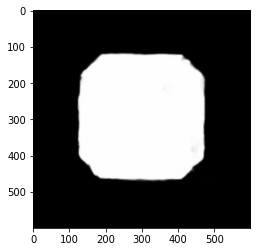

In [33]:
# convert output to numpy array and rescale(255 for RBG images)
RESCALE = 255
out_img = img_to_array(output)
out_img /= RESCALE
import matplotlib.pyplot as plt
plt.imshow(out_img)

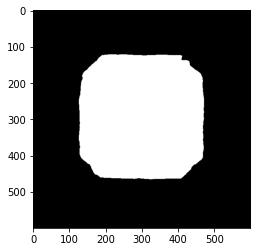

In [34]:
# define the cutoff threshold below which, background will be removed.
THRESHOLD = 0.9

# refine the output
out_img[out_img > THRESHOLD] = 1
out_img[out_img <= THRESHOLD] = 0
plt.imshow(out_img)

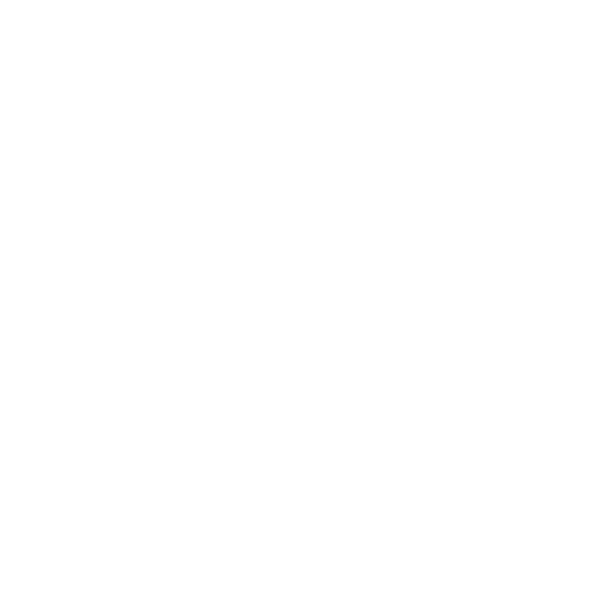

In [35]:
# convert the rbg image to an rgba image and set the zero values to transparent
shape = out_img.shape
a_layer_init = np.ones(shape = (shape[0],shape[1],1))
mul_layer = np.expand_dims(out_img[:,:,0],axis=2)
a_layer = mul_layer*a_layer_init
rgba_out = np.append(out_img,a_layer,axis=2)
display(Img.fromarray((rgba_out*RESCALE).astype('uint8'), 'RGBA'))

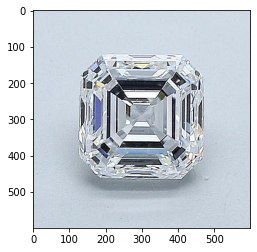

In [36]:
# load and convert input to numpy array and rescale(255 for RBG images)
input = load_img('/content/U-2-Net/images/'+name+'.png')
inp_img = img_to_array(input)
inp_img /= RESCALE
plt.imshow(inp_img)

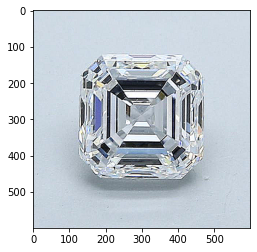

In [37]:
# since the output image is rgba, convert this also to rgba, but with no transparency
a_layer = np.ones(shape = (shape[0],shape[1],1))
rgba_inp = np.append(inp_img,a_layer,axis=2)
plt.imshow(rgba_inp)

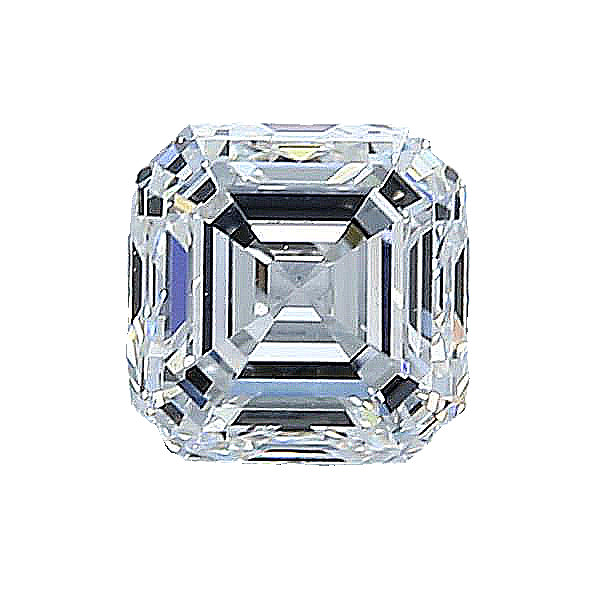

In [38]:
# simply multiply the 2 rgba images to remove the backgound
rem_back = (rgba_inp*rgba_out)
rem_back_scaled = Img.fromarray((rem_back*RESCALE).astype('uint8'), 'RGBA')
display(rem_back_scaled)
# --same, but using cv2--
#rem_back_cv = rem_back[:,:,[2,1,0,3]]
#from google.colab.patches import cv2_imshow
#cv2_imshow(rem_back_cv*RESCALE)

In [39]:
# save the resulting image to colab
rem_back_scaled.save('./results/'+name+'_background_removed_sharped.png')

# Super Impose 

- Simple background removed image
- Sharpen image with removed background

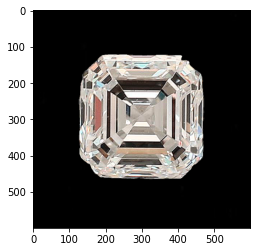

In [51]:
# from PIL import Image
  
# img1 = Image.open(r'./results/'+name+'_background_removed_sharped.png')
# img2 = Image.open(r'./results/'+name2+'_background_changed.png')
  
# No transparency mask specified, 
# simulating an raster overlay
# img1.paste(img2, (0,0))
  
img1 = cv2.imread('./results/'+name+'_background_removed_sharped.png')
img2 = cv2.imread('./results/'+name2+'_background_changed.png')
dst = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)

img_arr = np.hstack((img1, img2))
# cv2.imshow('Input Images', img_arr)
# plt.imshow(img_arr)
# cv2.imshow('Blended Image', dst)
plt.imshow(dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

# plt.imshow(img1)

-1

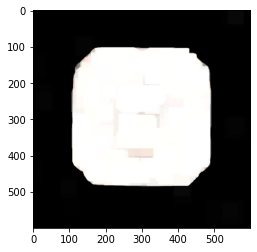

In [68]:
kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(dst, kernel, iterations=10)
plt.imshow(img_dilation)
cv2.waitKey(0)

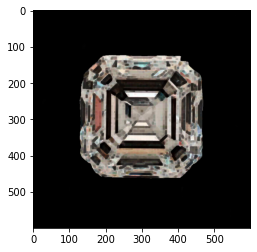

In [67]:
img_erosion = cv2.erode(dst, kernel, iterations=1)
plt.imshow(img_erosion)